# Analysis of Solomon 8.15.18 MOES Quantitative Data Final
## Utility class to get a panda df from Excel

In [67]:
import pandas as pd
import numpy as np
import unittest
import logging
import os.path
from pandas.util.testing import assert_frame_equal
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

class panda_reader():
    filename = None
    worksheetname = None
    df = None

    # Getters and setters for filename, worksheetname, and df
    def getFilename(self):
        if self.filename is None:
            logger.info('filename is not yet set!!')
            return None
        else:
            logger.debug('About to return current filename, which is: ' + self.filename)
        
        return self.filename
        
    # Setter for filename. Returns True if the file was found, False otherwise. 
    # Results can be disregarded if you are writing the file. 
    def setFilename(self, fn):
        logger.debug('About to set filename to: ' + fn)
        self.filename = fn
        if not os.path.isfile(fn):
            logger.warning('Cannot find file ' + fn)
            return False
        return True

        
    def getWorksheetName(self):
        return self.worksheetname
    
    def setWorksheetName(self, wks):
        logger.debug('About to set worksheet to: ' + wks)
        self.worksheetname = wks
        
    def getDf(self):
        return self.df

    # Return a tiny test dataframe
    def test_df(self):
        data = np.array([['','Col1','Col2'],
                         ['Row1',1,2],
                         ['Row2',3,4]])
                
        return (pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:]))
    
    # Write the given df to the excelFileName and excelWorksheet (unless they have already been 
    # provided and are then optional.)
    def write_df_to_excel(self, df=None, excelFileName=None, excelWorksheet=None):
        # Use df (passed param) if it's set, self.df otherwise.
        if df is None:
            mydf = self.df
        else:
            mydf = df
        fn  = excelFileName or self.filename # If excelFileName is set, then use it. If None, then use self.filename.
        wks = excelWorksheet or self.worksheetname # Use the passed excelWorksheet, if available. 
        self.setFilename(fn)
        self.setWorksheetName(wks)
        writer = pd.ExcelWriter(fn)
        mydf.to_excel(writer, wks)
        writer.save()
        
    # Read the given excelFileName and excelWorksheet (unless they have already been 
    # provided and are then optional.) return the df in the given worksheet. 
    def read_df_from_excel(self, excelFileName=None, excelWorksheet=None, header=0):
        logger.debug("Starting read_df_from_excel")
        fn = excelFileName or self.filename
        fileFound = self.setFilename(fn)
        logger.debug("Will read from the Excel file: " + fn)
        if fileFound:
            wks = excelWorksheet or self.worksheetname
            self.setWorksheetName(excelWorksheet)
            logger.debug("Will read from the worksheet: " + wks)
            self.df = pd.read_excel(fn, sheet_name=wks, header=header)

            return self.df
        else:
            logger.error("Can't find Excel file: " + fn)
            return None
        
    # Get a list of the headers
    def get_df_headers(self):
        if self.df is not None:
            return self.df.columns.tolist()
        else:
            logger.error("df is empty. Returning None for headers.")
            return None


INFO:__main__:Starting main
DEBUG:__main__:About to set filename to: MOES_Quantitative_Data_Final_25Aug18.xlsx
DEBUG:__main__:Found the file
DEBUG:__main__:Starting read_df_from_excel
DEBUG:__main__:About to set filename to: MOES_Quantitative_Data_Final_25Aug18.xlsx
DEBUG:__main__:Will read from the Excel file: MOES_Quantitative_Data_Final_25Aug18.xlsx
DEBUG:__main__:About to set worksheet to: Minus Partial Completions
DEBUG:__main__:Will read from the worksheet: Minus Partial Completions
C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
DEBUG:__main__:-----------
DEBUG:__main__:-----------
INFO:__main__:Done.


    index                           Participant    date_survey_taken  \
3     2.0  6303bc10-ff60-48a1-81a9-be8b37ea7fcd  2016-05-14 21:47:00   
5     4.0  49694f11-0d24-4bd6-aa96-43a5c7872262  2016-05-15 07:56:00   
7     6.0  1639567d-947e-4c3b-89dd-c801bf39a0ab  2016-06-07 22:17:00   
9     8.0  e4f6fd3e-3fde-441d-bd20-ac32c1638035  2016-06-09 06:43:00   
11   10.0  d5db7870-5d79-4ff2-9064-f58e49802483  2016-06-09 17:32:00   

    date_between_survey       page1       page2       page3   X1   X2   X3  \
3            188.180556  160.135799   47.026560   34.229927  2.0  0.0  0.0   
5            197.400000  251.571578  130.025017  127.525612  3.0  3.0  1.0   
7            224.729167  199.842927   82.874621   42.343850  3.0  3.0  3.0   
9            197.159722  439.121549   61.728797   45.962699  1.0  1.0  1.0   
11           197.170139  190.776443  111.651450  204.057819  2.0  1.0  1.0   

                          ...                          Y10   Y  delta_Y  \
3                      

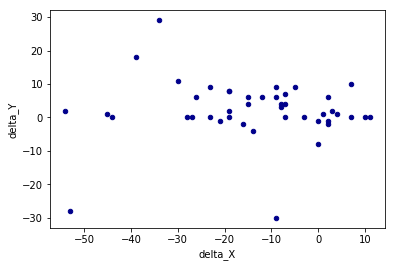

In [72]:
import logging
import os.path
import numpy as np
import pandas as pd

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

fn = 'MOES_Quantitative_Data_Final_25Aug18.xlsx'

def massage_df(df, headers):
    ansDf = df.iloc[1:] # get rid of verbose headers in row 2 of the Excel worksheet 
#    ansDf[['X1', 'X2']] = ansDf[['X1', 'X2']].apply(pd.to_numeric())
    non_numeric_cols_to_remove = ['Participant', 'date_survey_taken', 'Gender', 'Age', 'Ethnicity', 'Education', 'Branch', 'Campaigns']
    for col in non_numeric_cols_to_remove:
        headers.remove(col)
    ansDf[headers] = ansDf[headers].apply(pd.to_numeric, errors='coerce')

    return ansDf

if __name__ == '__main__':
    logger.info('Starting main')
    my_lib = panda_reader()
    if my_lib.setFilename(fn):
        logger.debug('Found the file')
    else:
        logger.debug('did not find the file')
    df = my_lib.read_df_from_excel(excelFileName=fn, excelWorksheet='Minus Partial Completions')
    df = massage_df(df, my_lib.get_df_headers())
    
    # print (my_lib.get_df_headers())
    df.dropna(inplace=True) # Gets rid of NaN
    logger.debug('-----------')
    print (df.head())
    logger.debug('-----------')
    df.plot.scatter(x='delta_X', y='delta_Y', c='DarkBlue')
    logger.info('Done.')

In [69]:
df.head()

,index,Participant,date_survey_taken,page1,page2,page3,X1,X2,X3,X4,...,Y10,Y,delta_Y,Gender,Age,decade_age,Ethnicity,Education,Branch,Campaigns
1,1.0,3e6038ab-3ce6-4cf3-bcef-3fcd71a38712,2016-04-23 18:32:00,125.588549,74.088909,71.542415,2.0,2.0,3.0,3.0,...,3.0,35.0,1.0,Male,65-74 years old,6.0,White,"Some college credit, no degree",Army,",,,Vietnam,,"
3,3.0,6303bc10-ff60-48a1-81a9-be8b37ea7fcd,2016-05-14 21:47:00,160.135799,47.026560,34.229927,2.0,0.0,0.0,1.0,...,4.0,39.0,0.0,Male,25-34 years old,2.0,White,"Some college credit, no degree",Marine Corps,"OperationEnduringFreedom,OperationIraqiFreedom..."
5,5.0,49694f11-0d24-4bd6-aa96-43a5c7872262,2016-05-15 07:56:00,251.571578,130.025017,127.525612,3.0,3.0,1.0,3.0,...,3.0,31.0,4.0,Male,25-34 years old,2.0,Hispanic or Latino,"Some college credit, no degree",Marine Corps,",OperationIraqiFreedom,,,,"
7,7.0,1639567d-947e-4c3b-89dd-c801bf39a0ab,2016-06-07 22:17:00,199.842927,82.874621,42.343850,3.0,3.0,3.0,4.0,...,1.0,10.0,0.0,Male,45-54 years old,4.0,Hispanic or Latino,Associate degree,Army,"OperationEnduringFreedom,,DesertStorm,,,"
9,9.0,e4f6fd3e-3fde-441d-bd20-ac32c1638035,2016-06-09 06:43:00,439.121549,61.728797,45.962699,1.0,1.0,1.0,2.0,...,3.0,36.0,4.0,Male,35-44 years old,3.0,White,"Some college credit, no degree",Army,"OperationEnduringFreedom,OperationIraqiFreedom..."


In [70]:
df.dtypes


index                float64
Participant           object
date_survey_taken     object
page1                float64
page2                float64
page3                float64
X1                   float64
X2                   float64
X3                   float64
X4                   float64
X5                   float64
X6                   float64
X7                   float64
X8                   float64
X9                   float64
X10                  float64
X11                  float64
X12                  float64
X13                  float64
X14                  float64
X15                  float64
X16                  float64
X17                  float64
X18                  float64
X19                  float64
X20                  float64
X                    float64
delta_X              float64
Y1                   float64
Y2                   float64
Y3                   float64
Y4                   float64
Y5                   float64
Y6                   float64
Y7            